In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install pandas-datareader
!pip install tensorflow
!pip install sklearn


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [3]:
crypto_currency = 'BTC'
against_currency = 'USD'

In [4]:
start = dt.datetime(2015,1,1)
end = dt.datetime.now()

In [5]:
data = web.DataReader(f'{crypto_currency}-{against_currency}', 'yahoo', start, end)

In [6]:
print(data.head())

                  High         Low        Open       Close    Volume  \
Date                                                                   
2014-12-31  320.192993  310.210999  310.914001  320.192993  13942900   
2015-01-01  320.434998  314.002991  320.434998  314.248993   8036550   
2015-01-02  315.838989  313.565002  314.079010  315.032013   7860650   
2015-01-03  315.149994  281.082001  314.846008  281.082001  33054400   
2015-01-04  287.230011  257.612000  281.145996  264.195007  55629100   

             Adj Close  
Date                    
2014-12-31  320.192993  
2015-01-01  314.248993  
2015-01-02  315.032013  
2015-01-03  281.082001  
2015-01-04  264.195007  


In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [8]:
#prediction day
prediction_days = 60
future_day = 90

x_train, y_train = [],[]

#for x in range(prediction_days, len(scaled_data)):
#    x_train.append(scaled_data[x-prediction_days:x, 0])
#    y_train.append(scaled_data[x, 0])
    
for x in range(prediction_days, len(scaled_data)-future_day):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x+future_day, 0])

In [9]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

In [10]:
#create Neural Network
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))


In [11]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=300, batch_size=32)

Epoch 1/300
80/80 [==============================] - 7s 41ms/step - loss: 0.0256
Epoch 2/300
80/80 [==============================] - 3s 41ms/step - loss: 0.0152
Epoch 3/300
80/80 [==============================] - 4s 46ms/step - loss: 0.0141
Epoch 4/300
80/80 [==============================] - 3s 43ms/step - loss: 0.0108
Epoch 5/300
80/80 [==============================] - 4s 44ms/step - loss: 0.0096
Epoch 6/300
80/80 [==============================] - 4s 45ms/step - loss: 0.0105
Epoch 7/300
80/80 [==============================] - 4s 47ms/step - loss: 0.0092
Epoch 8/300
80/80 [==============================] - 3s 42ms/step - loss: 0.0090
Epoch 9/300
80/80 [==============================] - 3s 43ms/step - loss: 0.0088
Epoch 10/300
80/80 [==============================] - 4s 44ms/step - loss: 0.0086
Epoch 11/300
80/80 [==============================] - 4s 44ms/step - loss: 0.0087
Epoch 12/300
80/80 [==============================] - 4s 45ms/step - loss: 0.0082
Epoch 13/300
80/80 [=====

80/80 [==============================] - 4s 44ms/step - loss: 0.0018
Epoch 102/300
80/80 [==============================] - 3s 43ms/step - loss: 0.0016
Epoch 103/300
80/80 [==============================] - 4s 45ms/step - loss: 0.0016
Epoch 104/300
80/80 [==============================] - 3s 44ms/step - loss: 0.0017
Epoch 105/300
80/80 [==============================] - 4s 44ms/step - loss: 0.0015
Epoch 106/300
80/80 [==============================] - 3s 44ms/step - loss: 0.0017
Epoch 107/300
80/80 [==============================] - 3s 43ms/step - loss: 0.0017
Epoch 108/300
80/80 [==============================] - 3s 43ms/step - loss: 0.0016
Epoch 109/300
80/80 [==============================] - 4s 46ms/step - loss: 0.0015
Epoch 110/300
80/80 [==============================] - 4s 48ms/step - loss: 0.0015
Epoch 111/300
80/80 [==============================] - 4s 48ms/step - loss: 0.0018
Epoch 112/300
80/80 [==============================] - 4s 46ms/step - loss: 0.0015
Epoch 113/300
80/8

80/80 [==============================] - 3s 43ms/step - loss: 0.0010
Epoch 200/300
80/80 [==============================] - 3s 43ms/step - loss: 9.6243e-04
Epoch 201/300
80/80 [==============================] - 4s 44ms/step - loss: 9.4779e-04
Epoch 202/300
80/80 [==============================] - 3s 43ms/step - loss: 8.5449e-04
Epoch 203/300
80/80 [==============================] - 3s 43ms/step - loss: 0.0010
Epoch 204/300
80/80 [==============================] - 3s 43ms/step - loss: 0.0010
Epoch 205/300
80/80 [==============================] - 3s 43ms/step - loss: 9.9124e-04
Epoch 206/300
80/80 [==============================] - 3s 43ms/step - loss: 9.6995e-04
Epoch 207/300
80/80 [==============================] - 3s 43ms/step - loss: 9.2864e-04
Epoch 208/300
80/80 [==============================] - 3s 43ms/step - loss: 9.3985e-04
Epoch 209/300
80/80 [==============================] - 4s 44ms/step - loss: 9.8047e-04
Epoch 210/300
80/80 [==============================] - 4s 45ms/step -

80/80 [==============================] - 4s 45ms/step - loss: 8.1251e-04
Epoch 295/300
80/80 [==============================] - 4s 45ms/step - loss: 8.7238e-04
Epoch 296/300
80/80 [==============================] - 4s 44ms/step - loss: 7.3481e-04
Epoch 297/300
80/80 [==============================] - 3s 43ms/step - loss: 7.9780e-04
Epoch 298/300
80/80 [==============================] - 4s 46ms/step - loss: 8.5538e-04
Epoch 299/300
80/80 [==============================] - 4s 50ms/step - loss: 9.3239e-04
Epoch 300/300
80/80 [==============================] - 4s 46ms/step - loss: 8.2610e-04


In [12]:
#testing Model

test_start = dt.datetime(2019,1,1)                          
test_end= dt.datetime.now()

In [13]:
test_data = web.DataReader(f'{crypto_currency}-{against_currency}', 'yahoo', test_start, test_end)
actual_prices = test_data['Close'].values

In [14]:
total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

In [15]:
model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.fit_transform(model_inputs)

In [16]:
x_test = []

for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])

In [17]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [18]:
prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)

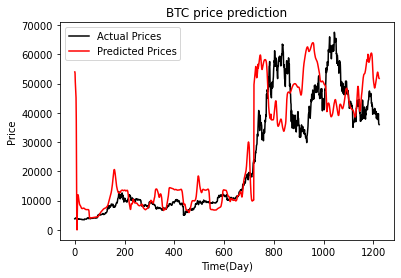

In [19]:
plt.plot(actual_prices, color='black', label='Actual Prices')
plt.plot(prediction_prices, color='red', label='Predicted Prices')
plt.title(f'{crypto_currency} price prediction')
plt.xlabel('Time(Day)')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()